<a href="https://colab.research.google.com/github/eliottdouieb/Handwritten_Digit_Letter_Recognition/blob/main/CNN_hanwritten_digits_and_letters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras import layers, Dense, Input, InputLayer, Flatten
# from tensorflow.keras.models import Sequential, Model
from keras.layers import Dropout
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from  matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.image as mpimg
%matplotlib inline
import random
from google.colab import drive
drive.mount('/content/drive')
directory = """/content/drive/MyDrive/project_data_mining/Img/"""

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/project_data_mining/english.csv')
df.head()

,image,label
0,Img/img001-001.png,0
1,Img/img001-002.png,0
2,Img/img001-003.png,0
3,Img/img001-004.png,0
4,Img/img001-005.png,0


In [ ]:
df['image'] = df['image'].map(lambda x: x.lstrip('Img/'))
df.head()

,image,label
0,img001-001.png,0
1,img001-002.png,0
2,img001-003.png,0
3,img001-004.png,0
4,img001-005.png,0


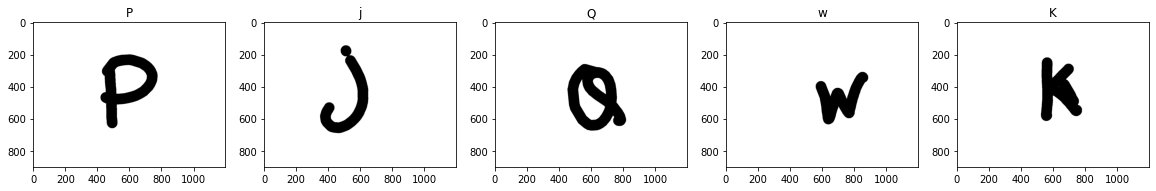

In [ ]:
plt.figure(figsize=(20,20))
# test_folder=r''
for i in range(5):
    file = random.choice(os.listdir(directory))
    image_path= os.path.join(directory, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(df.loc[df['image'] == file, 'label'].iloc[0])
    plt.imshow(img)

In [ ]:
df_numbers=df[df["label"].str.isdigit()]
print(len(df_numbers))
df_numbers

550


,image,label
0,img001-001.png,0
1,img001-002.png,0
2,img001-003.png,0
3,img001-004.png,0
4,img001-005.png,0
...,...,...
545,img010-051.png,9
546,img010-052.png,9
547,img010-053.png,9
548,img010-054.png,9


In [ ]:
df_letters=df[df["label"].str.isalpha()]
print(len(df_letters))
df_letters

2860


,image,label
550,img011-001.png,A
551,img011-002.png,A
552,img011-003.png,A
553,img011-004.png,A
554,img011-005.png,A
...,...,...
3405,img062-051.png,z
3406,img062-052.png,z
3407,img062-053.png,z
3408,img062-054.png,z


In [ ]:
def create_dataset(data,img_folder,isletters):
   
  img_data_array=[]
  class_name=[]
   
  for file in os.listdir(img_folder):
    if file in data['image'].values:
      image_path= os.path.join(img_folder, file)
      # image= cv2.imread(image_path, cv2.COLOR_BGR2RGB)
      image= cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
      image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
      image=np.array(image)
      image = image.astype('float32')
      image /= 255
      img_data_array.append(image)
      if isletters:
        class_name.append(data.loc[data['image'] == file, 'label'].iloc[0].upper())
      else:
        class_name.append(data.loc[data['image'] == file, 'label'].iloc[0])
  return img_data_array, class_name

In [ ]:
IMG_WIDTH=64
IMG_HEIGHT=64

In [ ]:
# extract the image array and class name
img_data_numbers, class_name_numbers =create_dataset(df_numbers, directory, False)

In [ ]:
# extract the image array and class name
img_data_letters, class_name_letters =create_dataset(df_letters, directory, True)

In [ ]:
len(img_data_numbers)

550

In [ ]:
len(img_data_letters)

2860

In [ ]:
label_dict_numbers={k: v for v, k in enumerate(np.unique(class_name_numbers))}
label_dict_letters={k: v for v, k in enumerate(np.unique(class_name_letters))}
#label_dict

In [ ]:
labels_numbers=  [label_dict_numbers[class_name_numbers[i]] for i in range(len(class_name_numbers))]
labels_letters=  [label_dict_letters[class_name_letters[i]] for i in range(len(class_name_letters))]
#labels

In [ ]:
label_dict_letters

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

In [ ]:
seed = np.random.randint(0, 100000)  
np.random.seed(seed)  
np.random.shuffle(img_data_letters)
np.random.seed(seed)  
np.random.shuffle(class_name_letters)
np.random.seed(seed)  
np.random.shuffle(labels_letters)
np.random.seed(seed)  
np.random.shuffle(img_data_numbers)
np.random.seed(seed)  
np.random.shuffle(class_name_numbers)
np.random.seed(seed)  
np.random.shuffle(labels_numbers)

In [ ]:
X_train_letters, X_test_letters, Y_train_letters, Y_test_letters = train_test_split(img_data_letters, labels_letters, test_size=0.2, random_state=0, stratify=labels_letters)
X_train_numbers, X_test_numbers, Y_train_numbers, Y_test_numbers = train_test_split(img_data_numbers, labels_numbers, test_size=0.2, random_state=0, stratify=labels_numbers)

In [ ]:
# datagen = ImageDataGenerator(
#     featurewise_center=True,
#     featurewise_std_normalization=True,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     horizontal_flip=True,
#     validation_split=0.2)

datagen = ImageDataGenerator(rotation_range=20)

X_train_numbers= np.array(X_train_numbers)
datagen.fit(X_train_numbers.reshape(440, 64, 64, 1))

# img_data_numbers_rot = ImageDataGenerator(rotation_range=20)
# X_train_numbers= img_data_numbers_rot.fit(X_train_numbers)

In [ ]:
datagen = ImageDataGenerator(rotation_range=20)

X_train_letters= np.array(X_train_letters)
datagen.fit(X_train_letters.reshape(2288, 64, 64, 1))

CNN Numbers

In [ ]:
model_numbers = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)))
model_numbers.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 1)))
model_numbers.add(layers.MaxPooling2D((2, 2)))
model_numbers.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_numbers.add(layers.MaxPooling2D((2, 2)))
model_numbers.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_numbers.add(Dropout(0.8))

In [ ]:
model_numbers.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 12, 12, 64)        36928     
                                                                 
 dropout_6 (Dropout)         (None, 12, 12, 64)       

In [ ]:
model_numbers.add(layers.Flatten())
model_numbers.add(Dropout(0.8))
model_numbers.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(62))
model_numbers.add(layers.Dense(10))

In [ ]:
model_numbers.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
# import tensor as tf
# X_train_numbers = tf.convert_to_tensor(X_train_numbers)
# Y_train_numbers = tf.convert_to_tensor(Y_train_numbers)
# X_test_numbers = tf.convert_to_tensor(X_test_numbers)
# Y_test_numbers = tf.convert_to_tensor(Y_test_numbers)

X_train_numbers= np.array(X_train_numbers)
Y_train_numbers= np.array(Y_train_numbers)
X_test_numbers= np.array(X_test_numbers)
Y_test_numbers= np.array(Y_test_numbers)
history_numbers = model_numbers.fit(X_train_numbers, Y_train_numbers, epochs=200, validation_data=(X_test_numbers, Y_test_numbers))

Epoch 1/200
14/14 [==============================] - 3s 188ms/step - loss: 2.3615 - accuracy: 0.0864 - val_loss: 2.3033 - val_accuracy: 0.0000e+00
Epoch 2/200
14/14 [==============================] - 2s 175ms/step - loss: 2.3029 - accuracy: 0.1068 - val_loss: 2.3015 - val_accuracy: 0.1000
Epoch 3/200
14/14 [==============================] - 2s 178ms/step - loss: 2.3037 - accuracy: 0.1114 - val_loss: 2.2996 - val_accuracy: 0.1000
Epoch 4/200
14/14 [==============================] - 2s 176ms/step - loss: 2.3052 - accuracy: 0.1205 - val_loss: 2.2987 - val_accuracy: 0.1273
Epoch 5/200
14/14 [==============================] - 2s 172ms/step - loss: 2.2973 - accuracy: 0.1250 - val_loss: 2.2966 - val_accuracy: 0.1182
Epoch 6/200
14/14 [==============================] - 2s 171ms/step - loss: 2.2987 - accuracy: 0.1341 - val_loss: 2.2902 - val_accuracy: 0.2818
Epoch 7/200
14/14 [==============================] - 2s 173ms/step - loss: 2.2882 - accuracy: 0.1250 - val_loss: 2.2786 - val_accuracy: 0.

4/4 - 0s - loss: 0.1319 - accuracy: 0.9545 - 157ms/epoch - 39ms/step


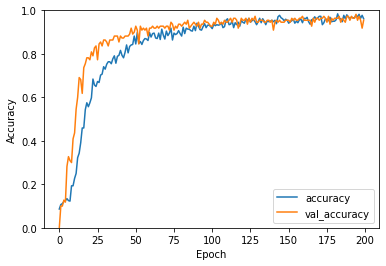

In [ ]:
plt.plot(history_numbers.history['accuracy'], label='accuracy')
plt.plot(history_numbers.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss_numbers, test_acc_numbers = model_numbers.evaluate(X_test_numbers,  Y_test_numbers, verbose=2)

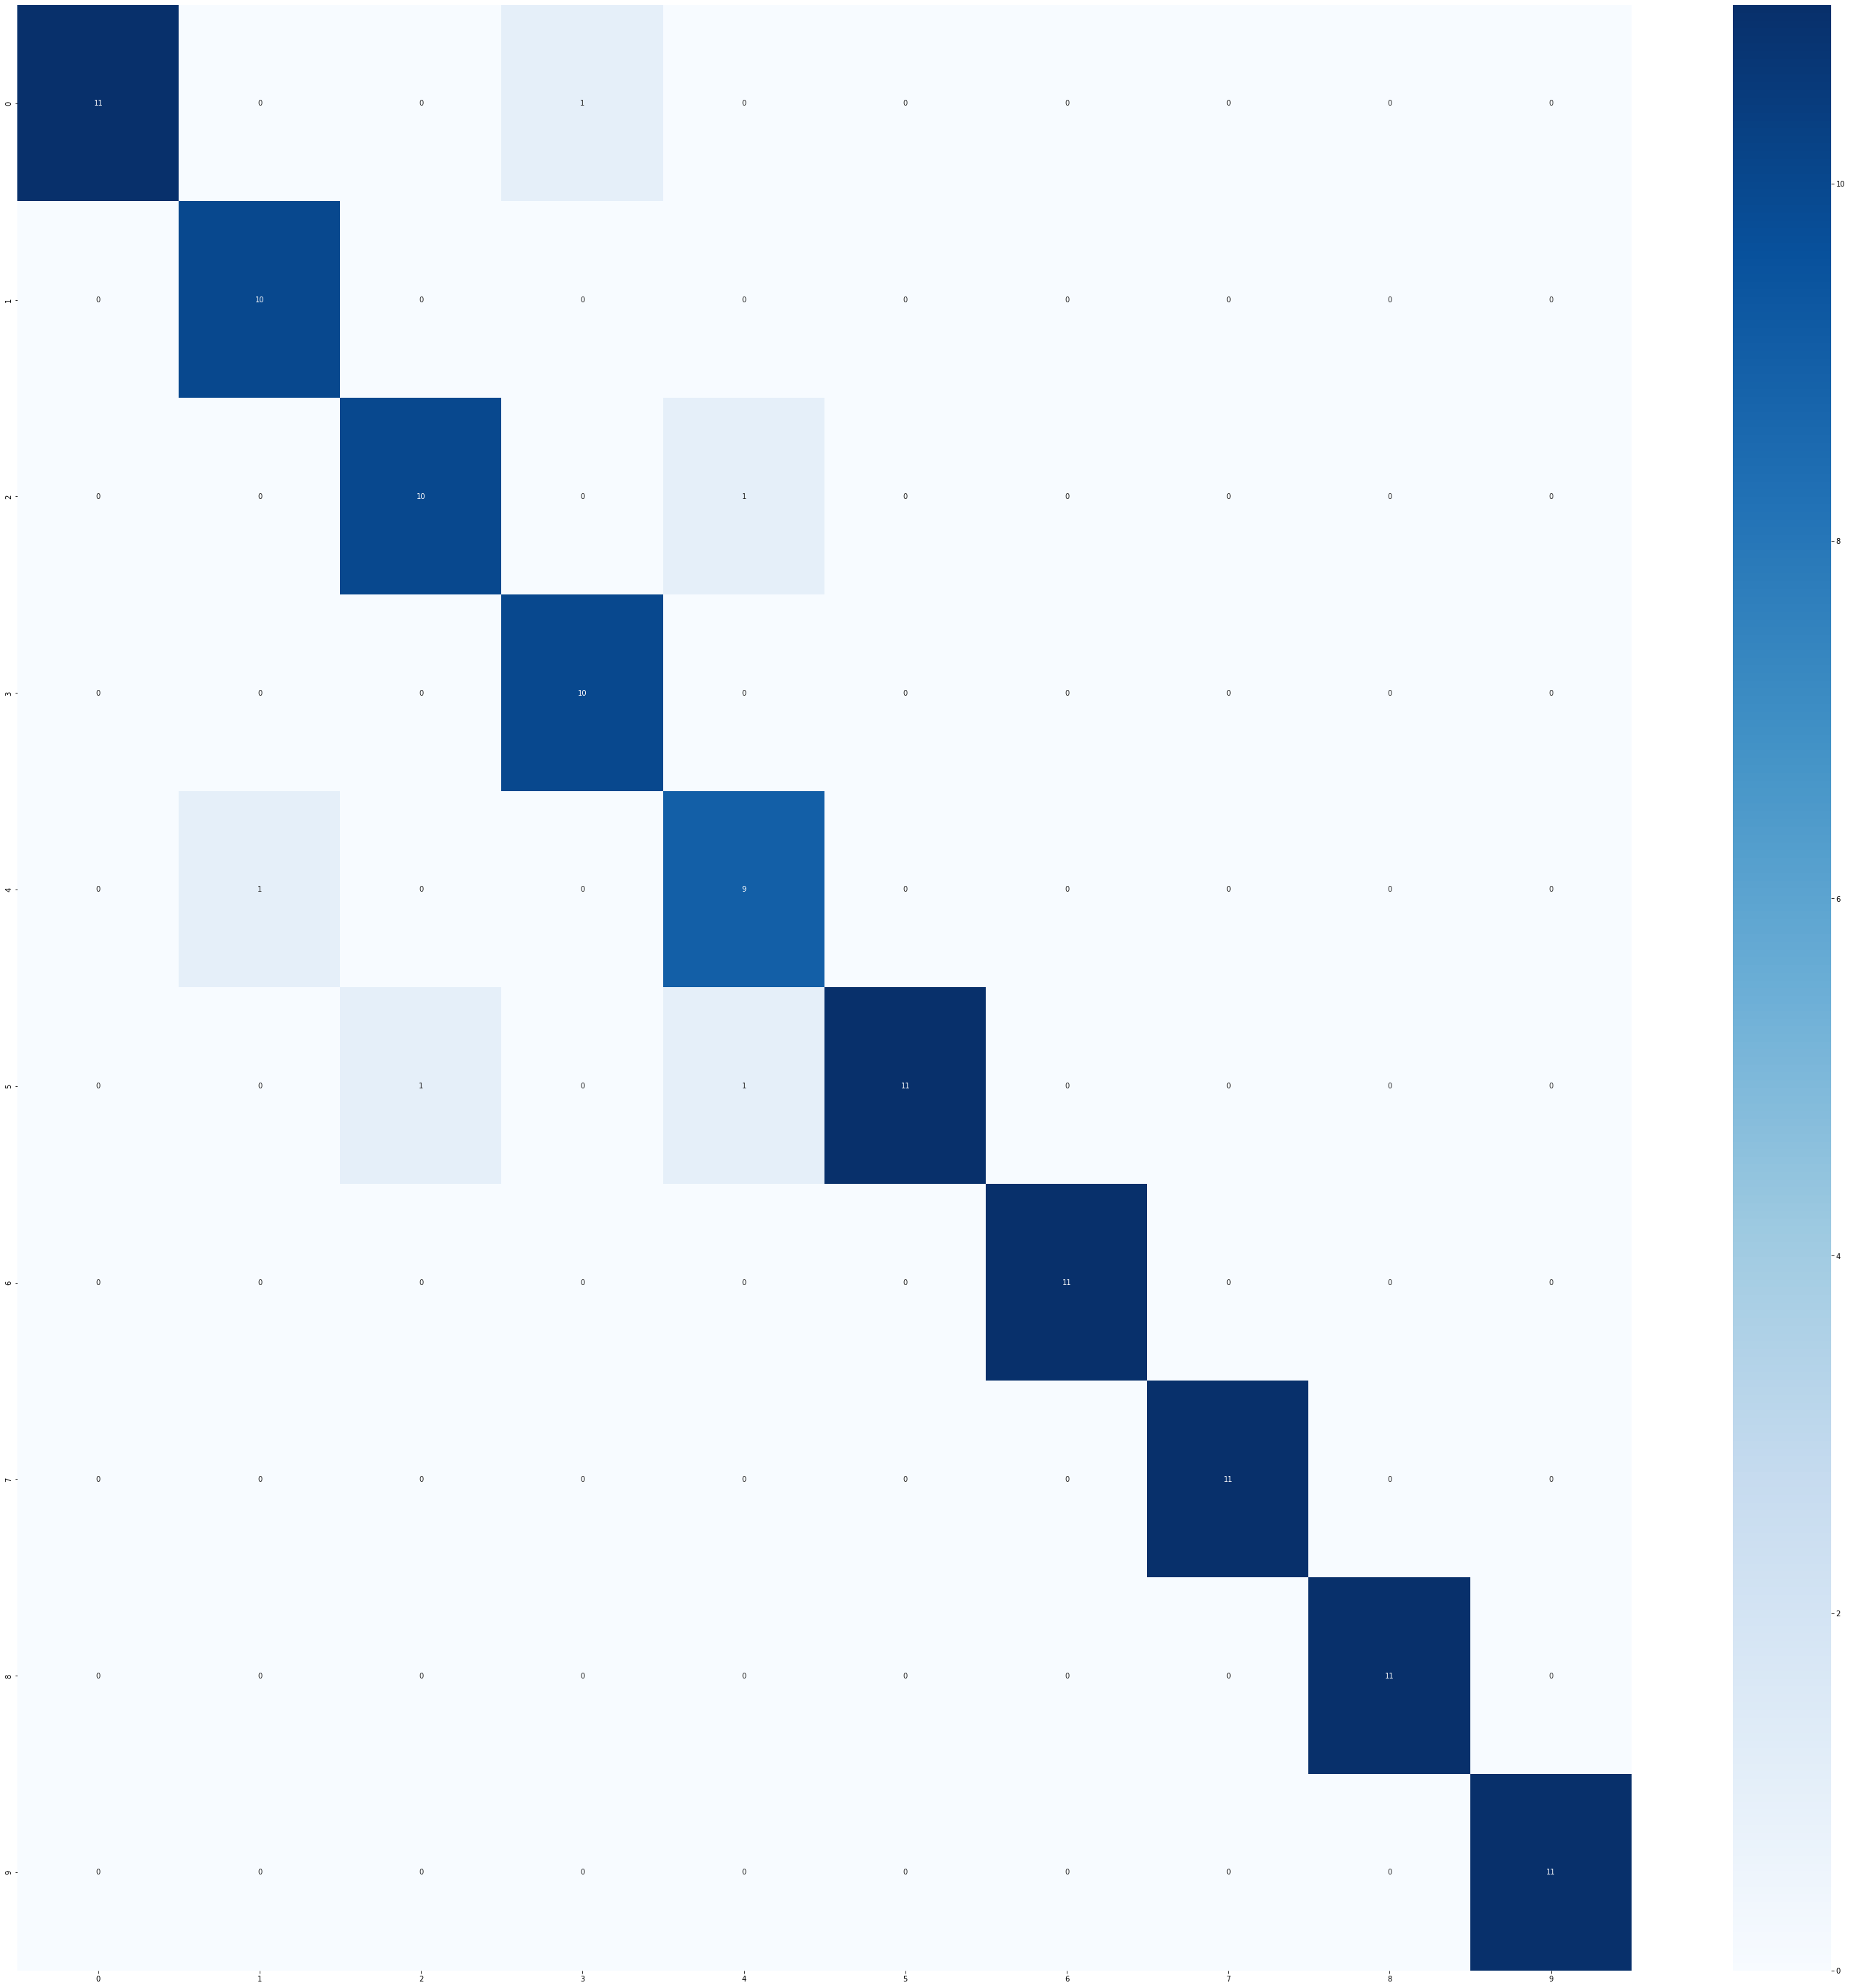

In [ ]:
ypred_numbers = model_numbers.predict(X_test_numbers)

shape1_numbers = ypred_numbers.shape[0]
shape2_numbers = ypred_numbers.shape[1]

ypred_numbers = np.argmax(ypred_numbers, axis=1).reshape(shape1_numbers)
ytrue_numbers = Y_test_numbers
ytrue_numbers = np.squeeze(ytrue_numbers).reshape(shape1_numbers)

cf_matrix = confusion_matrix(ypred_numbers, ytrue_numbers)
fig, ax = plt.subplots(figsize=(50,50)) 
sns.heatmap(cf_matrix, fmt='.0f', annot=True, cmap='Blues',ax=ax, xticklabels= label_dict_numbers.keys(), yticklabels= label_dict_numbers.keys())

In [ ]:
!pip install -q gradio


     |████████████████████████████████| 2.9 MB 37.9 MB/s 
     |████████████████████████████████| 84 kB 4.0 MB/s 
     |████████████████████████████████| 53 kB 2.3 MB/s 
     |████████████████████████████████| 212 kB 44.2 MB/s 
     |████████████████████████████████| 1.1 MB 37.6 MB/s 
     |████████████████████████████████| 2.0 MB 50.4 MB/s 
     |████████████████████████████████| 253 kB 47.0 MB/s 
     |████████████████████████████████| 54 kB 3.1 MB/s 
     |████████████████████████████████| 271 kB 60.0 MB/s 
     |████████████████████████████████| 144 kB 61.6 MB/s 
     |████████████████████████████████| 94 kB 3.4 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 10.9 MB 46.2 MB/s 
     |████████████████████████████████| 79 kB 7.6 MB/s 
     |████████████████████████████████| 43 kB 2.2 MB/s 
     |████████████████████████████████| 856 kB 56.6 MB/s 
     |████████████████████████████████| 62 kB 876 kB/s 
     |███████████████████████

In [ ]:
import os
from urllib.request import urlretrieve

import tensorflow as tf

import gradio
import gradio as gr
#create a function to make predictions
#return a dictionary of labels and probabilities
def numbersss(img):
    img = img.reshape(1, IMG_WIDTH, IMG_HEIGHT, 1)
    prediction = model_numbers.predict(img).tolist()[0]
    class_names = ['0','1','2','3','4','5','6','7','8','9']
    return {class_names[i]: prediction[i] for i in range(10)}

#set the user uploaded image as the input array
#match same shape as the input shape in the model
im = gradio.inputs.Image(shape=(IMG_HEIGHT, IMG_HEIGHT), image_mode='L', invert_colors=False, source="canvas")
#setup the interface
iface_numbers = gr.Interface(
    fn = numbersss, 
    inputs = im, 
    outputs = gradio.outputs.Label(num_top_classes=1),
)
iface_numbers.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://58881.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<fastapi.applications.FastAPI at 0x7fe2e9ef2d90>,
 'http://127.0.0.1:7874/',
 'https://58881.gradio.app')

CNN Letters

In [ ]:
model_letters = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)))
model_letters.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 1)))
model_letters.add(layers.MaxPooling2D((2, 2)))
model_letters.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_letters.add(layers.MaxPooling2D((2, 2)))
model_letters.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_letters.add(Dropout(0.8))

In [ ]:
model_letters.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 12, 12, 64)        36928     
                                                                 
 dropout_8 (Dropout)         (None, 12, 12, 64)       

In [ ]:
model_letters.add(layers.Flatten())
model_letters.add(Dropout(0.8))
model_letters.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(62))
model_letters.add(layers.Dense(26))

In [ ]:
model_letters.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
X_train_letters= np.array(X_train_letters)
Y_train_letters= np.array(Y_train_letters)
X_test_letters= np.array(X_test_letters)
Y_test_letters= np.array(Y_test_letters)
# history_letters = model_letters.fit(X_train_letters, Y_train_letters, epochs=200, batch_size=32, validation_data=(X_test_letters, Y_test_letters))
history_letters = model_letters.fit(X_train_letters, Y_train_letters, epochs=250, validation_data=(X_test_letters, Y_test_letters))

Epoch 1/250
72/72 [==============================] - 22s 302ms/step - loss: 3.2681 - accuracy: 0.0476 - val_loss: 3.2569 - val_accuracy: 0.0542
Epoch 2/250
72/72 [==============================] - 20s 279ms/step - loss: 3.2557 - accuracy: 0.0424 - val_loss: 3.2443 - val_accuracy: 0.0629
Epoch 3/250
72/72 [==============================] - 12s 169ms/step - loss: 3.2249 - accuracy: 0.0573 - val_loss: 3.1384 - val_accuracy: 0.1311
Epoch 4/250
72/72 [==============================] - 12s 170ms/step - loss: 3.1315 - accuracy: 0.0927 - val_loss: 2.9044 - val_accuracy: 0.2797
Epoch 5/250
72/72 [==============================] - 12s 169ms/step - loss: 2.8867 - accuracy: 0.1495 - val_loss: 2.3918 - val_accuracy: 0.4003
Epoch 6/250
72/72 [==============================] - 12s 169ms/step - loss: 2.6200 - accuracy: 0.2308 - val_loss: 2.0950 - val_accuracy: 0.4073
Epoch 7/250
72/72 [==============================] - 12s 170ms/step - loss: 2.3439 - accuracy: 0.2990 - val_loss: 1.7153 - val_accuracy:

18/18 - 1s - loss: 0.4482 - accuracy: 0.8899 - 719ms/epoch - 40ms/step


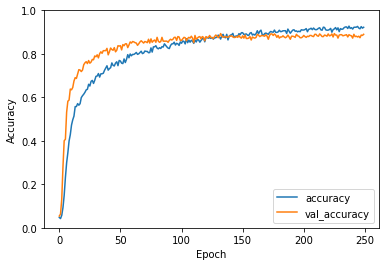

In [ ]:
plt.plot(history_letters.history['accuracy'], label='accuracy')
plt.plot(history_letters.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss_letters, test_acc_letters = model_letters.evaluate(X_test_letters,  Y_test_letters, verbose=2)

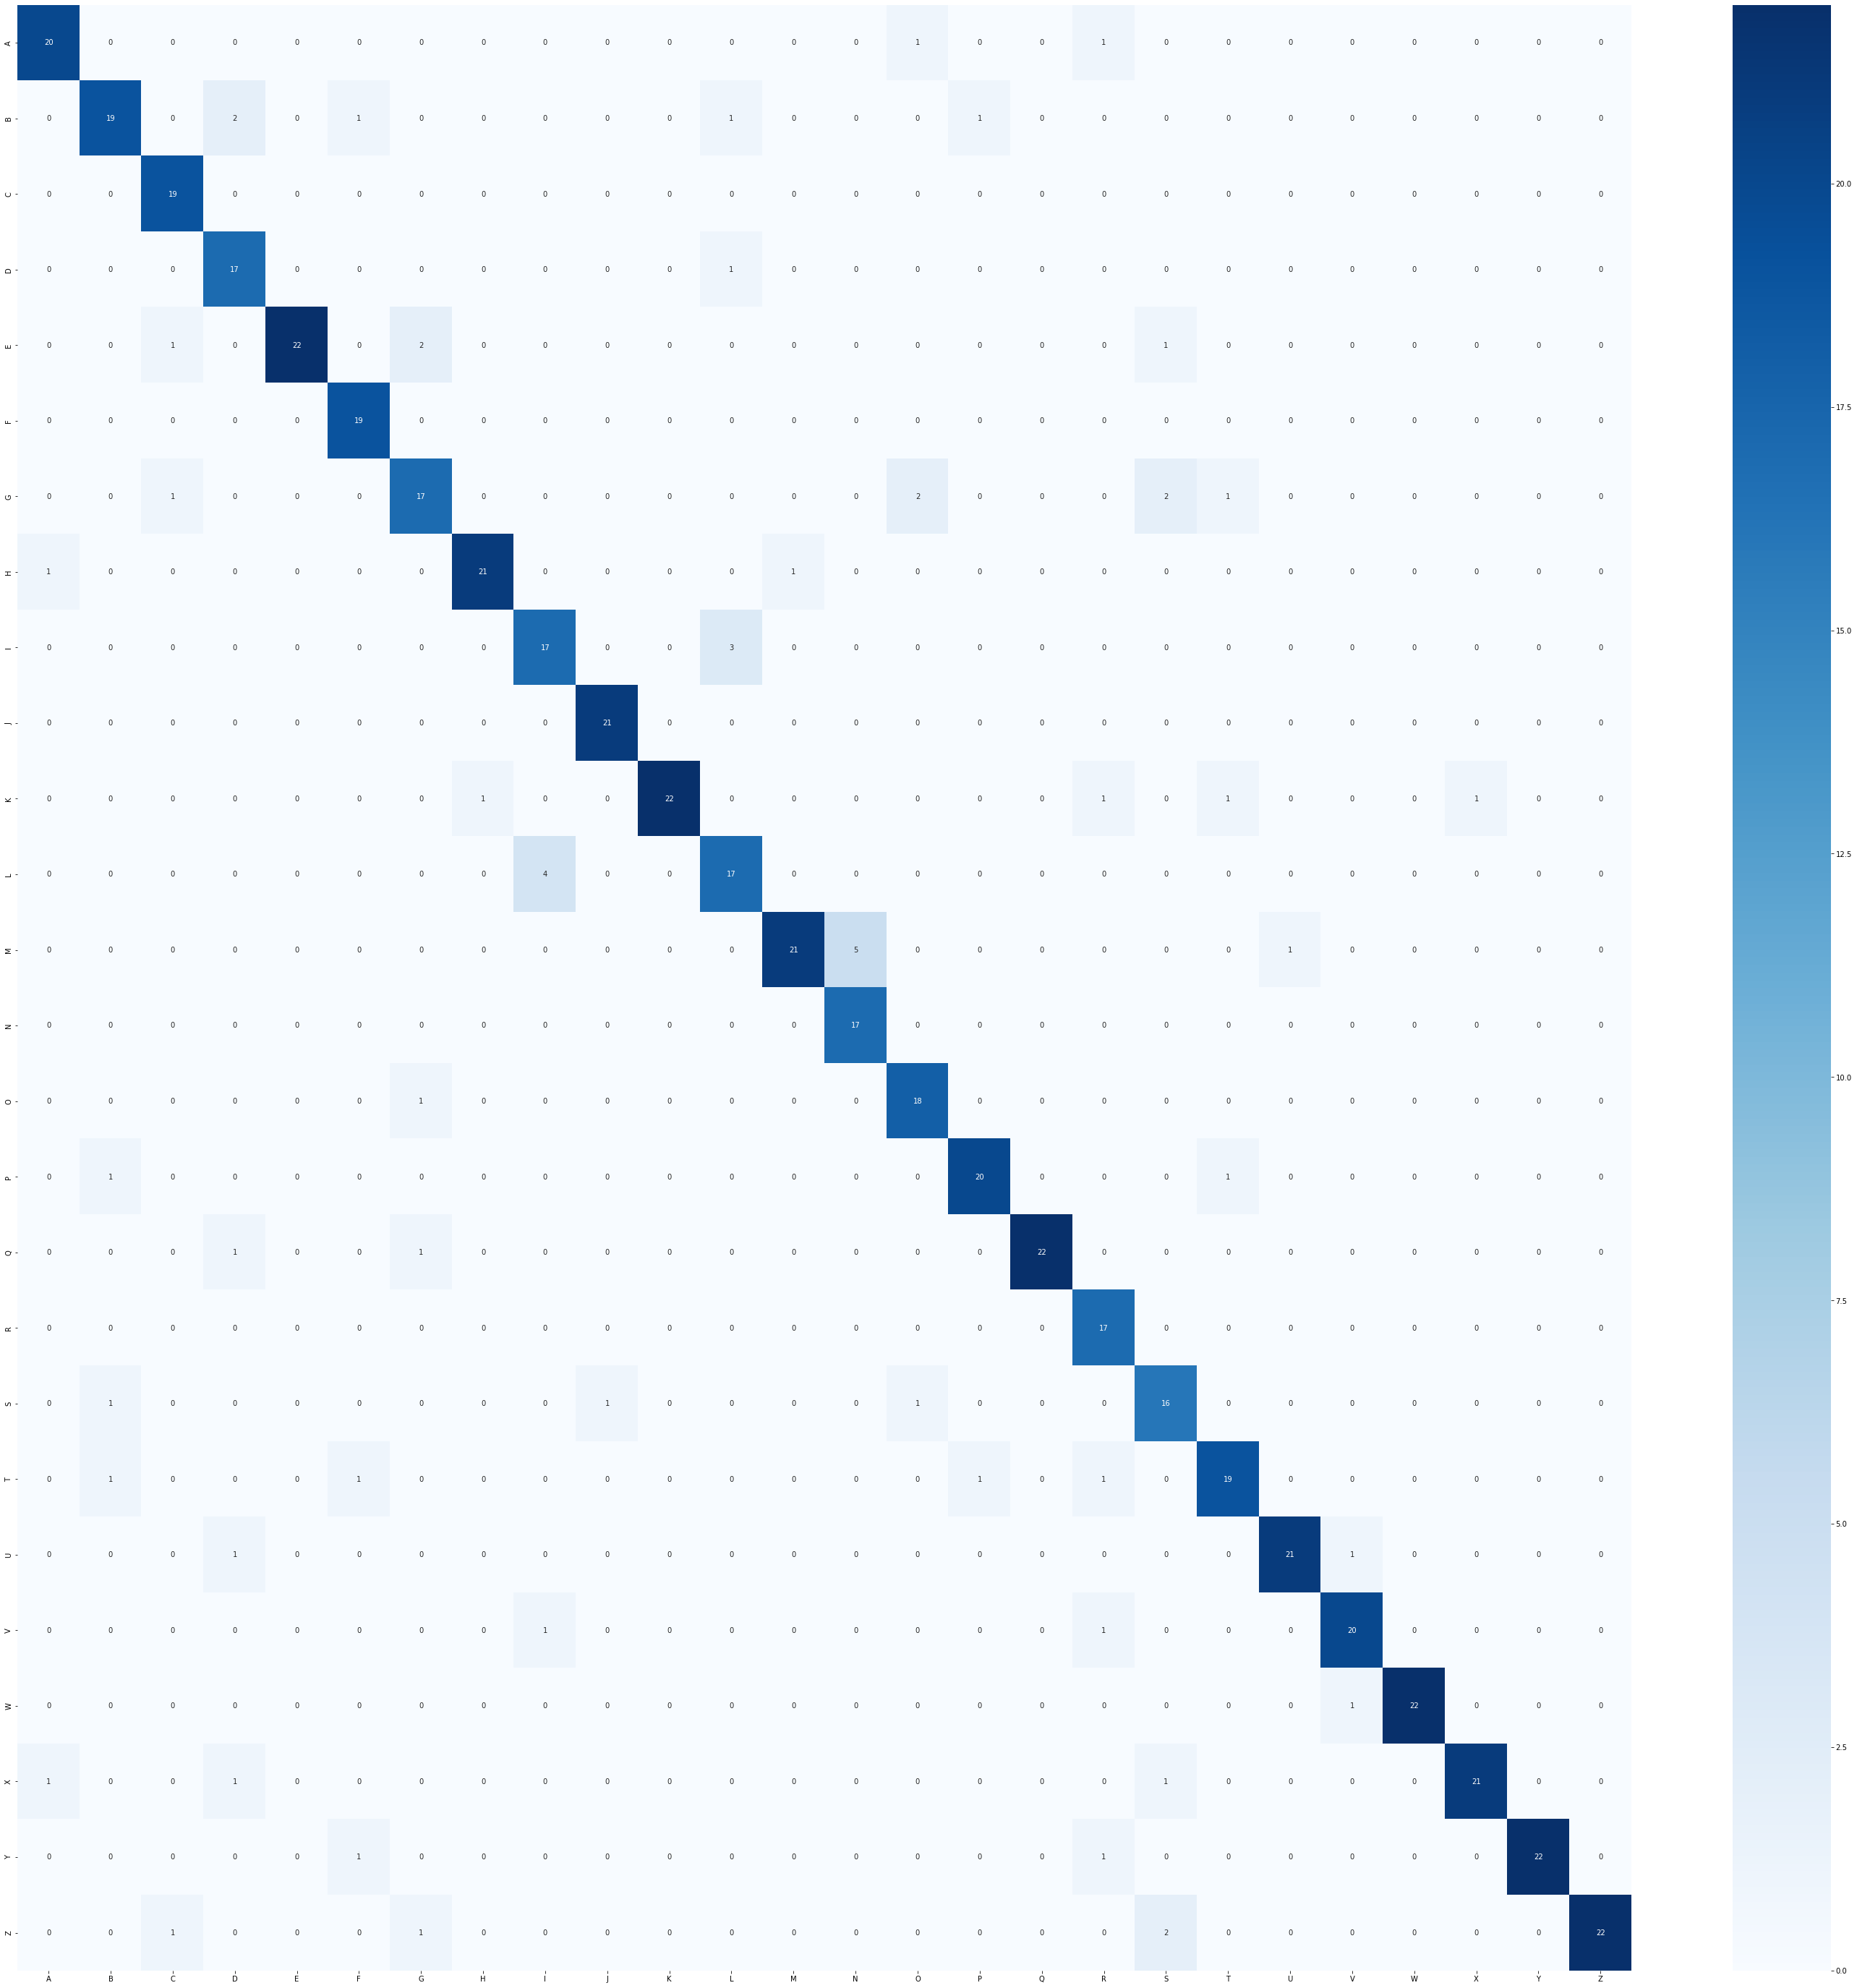

In [ ]:
ypred_letters = model_letters.predict(X_test_letters)

shape1_letters = ypred_letters.shape[0]
shape2_letters = ypred_letters.shape[1]

ypred_letters = np.argmax(ypred_letters, axis=1).reshape(shape1_letters)
ytrue_letters = Y_test_letters
ytrue_letters = np.squeeze(ytrue_letters).reshape(shape1_letters)

cf_matrix = confusion_matrix(ypred_letters, ytrue_letters)
fig, ax = plt.subplots(figsize=(50,50)) 
sns.heatmap(cf_matrix, fmt='.0f', annot=True, cmap='Blues',ax=ax, xticklabels= label_dict_letters.keys(), yticklabels= label_dict_letters.keys())

In [ ]:
key_list = list(label_dict_letters.keys())


#create a function to make predictions
#return a dictionary of labels and probabilities
def letters(img):
    img = img.reshape(1, IMG_WIDTH, IMG_HEIGHT, 1)
    prediction = model_letters.predict(img).tolist()[0]
    class_names = key_list
    return {class_names[i]: prediction[i] for i in range(26)}

#set the user uploaded image as the input array
#match same shape as the input shape in the model
im = gradio.inputs.Image(shape=(IMG_WIDTH, IMG_HEIGHT), image_mode='L', invert_colors=False, source="canvas")
#setup the interface
iface_letters = gr.Interface(
    fn = letters, 
    inputs = im, 
    outputs = gradio.outputs.Label(num_top_classes=1),
)
iface_letters.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://48713.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<fastapi.applications.FastAPI at 0x7fe2e9ef2d90>,
 'http://127.0.0.1:7875/',
 'https://48713.gradio.app')